<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/ClassicalMechanics/IntroductionToFunctionsAndArrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Arrays, Functions, and Plotting
# A Jupyter Notebook for Physics Students

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

## Introduction to NumPy Arrays

In [ ]:
# Creating arrays - the foundation of numerical computing
print("=== Creating Arrays ===")

# Create arrays from lists
velocities = np.array([10, 15, 20, 25, 30])  # m/s
print(f"Velocities: {velocities}")
print(f"Type: {type(velocities)}")
print(f"Shape: {velocities.shape}")

# Create arrays with specific functions
zeros_array = np.zeros(5)
ones_array = np.ones(5)
print(f"\nZeros array: {zeros_array}")
print(f"Ones array: {ones_array}")

# Array operations (vectorized - very efficient!)
kinetic_energy = 0.5 * 2.0 * velocities**2  # KE = (1/2)mv² for m=2kg
print(f"\nKinetic energies: {kinetic_energy} J")

=== Creating Arrays ===
Velocities: [10 15 20 25 30]
Type: <class 'numpy.ndarray'>
Shape: (5,)

Zeros array: [0. 0. 0. 0. 0.]
Ones array: [1. 1. 1. 1. 1.]

Kinetic energies: [100. 225. 400. 625. 900.] J


# The Power of np.linspace

In [ ]:
# np.linspace creates evenly spaced arrays - essential for physics calculations
print("=== Using np.linspace ===")

# Create time array for motion calculations
time = np.linspace(0, 10, 11)  # 0 to 10 seconds, 11 points
print(f"Time array: {time}")

# More practical example: high resolution time array
t_fine = np.linspace(0, 5, 101)  # 0 to 5 seconds, 101 points (100 intervals)
print(f"\nHigh resolution time (first 10 values): {t_fine[:10]}")
print(f"Time step: {t_fine[1] - t_fine[0]:.3f} seconds")

# Common physics ranges
angles = np.linspace(0, 2*np.pi, 100)  # Full circle in radians
print(f"\nAngle range: {angles[0]:.3f} to {angles[-1]:.3f} radians")

=== Using np.linspace ===
Time array: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]

High resolution time (first 10 values): [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45]
Time step: 0.050 seconds

Angle range: 0.000 to 6.283 radians


# Creating and Using Functions

In [ ]:
# Functions make code reusable and organized - crucial for physics calculations
print("=== Physics Functions ===")

def projectile_height(t, v0=20, g=9.80):
    """
    Calculate height of projectile as function of time

    Parameters:
    t: time (seconds)
    v0: initial velocity (m/s), default 20 m/s
    g: acceleration due to gravity (m/s²), default 9.80 m/s²

    Returns:
    height (meters)
    """
    return v0 * t - 0.5 * g * t**2

def simple_harmonic_motion(t, A=1.0, omega=1.0, phi=0):
    """
    Simple harmonic oscillator: x(t) = A*cos(ωt + φ)

    Parameters:
    t: time array
    A: amplitude (default 1.0)
    omega: angular frequency (default 1.0 rad/s)
    phi: phase (default 0)

    Returns:
    position as function of time
    """
    return A * np.cos(omega * t + phi)

# Test our functions
test_time = np.array([0, 1, 2, 3])
heights = projectile_height(test_time)
print(f"Times: {test_time} s")
print(f"Heights: {heights} m")

# Function with different parameters
heights_low_g = projectile_height(test_time, v0=20, g=1.6)  # Moon gravity
print(f"Heights on Moon: {heights_low_g} m")

=== Physics Functions ===
Times: [0 1 2 3] s
Heights: [ 0.    15.095 20.38  15.855] m
Heights on Moon: [ 0.  19.2 36.8 52.8] m


# Basic Plotting - Visualizing Physics

=== Creating Our First Plot ===


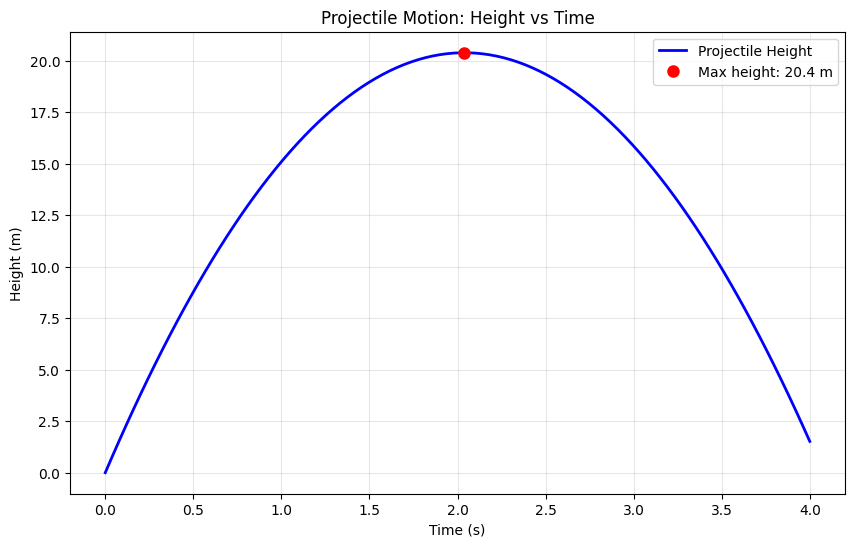

Maximum height occurs at t = 2.04 s


In [ ]:
# Plotting is essential for understanding physics phenomena
print("=== Creating Our First Plot ===")

# Create time array
t = np.linspace(0, 4, 100)

# Calculate projectile trajectory
h = projectile_height(t, v0=20, g=9.81)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(t, h, 'b-', linewidth=2, label='Projectile Height')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Projectile Motion: Height vs Time')
plt.grid(True, alpha=0.3)
plt.legend()

# Add some physics insights
max_height_time = 20/9.81  # v₀/g
max_height = projectile_height(max_height_time)
plt.plot(max_height_time, max_height, 'ro', markersize=8, label=f'Max height: {max_height:.1f} m')
plt.legend()

plt.show()
print(f"Maximum height occurs at t = {max_height_time:.2f} s")

# Multiple Plots - Comparing Different Scenarios

=== Comparing Different Initial Velocities ===


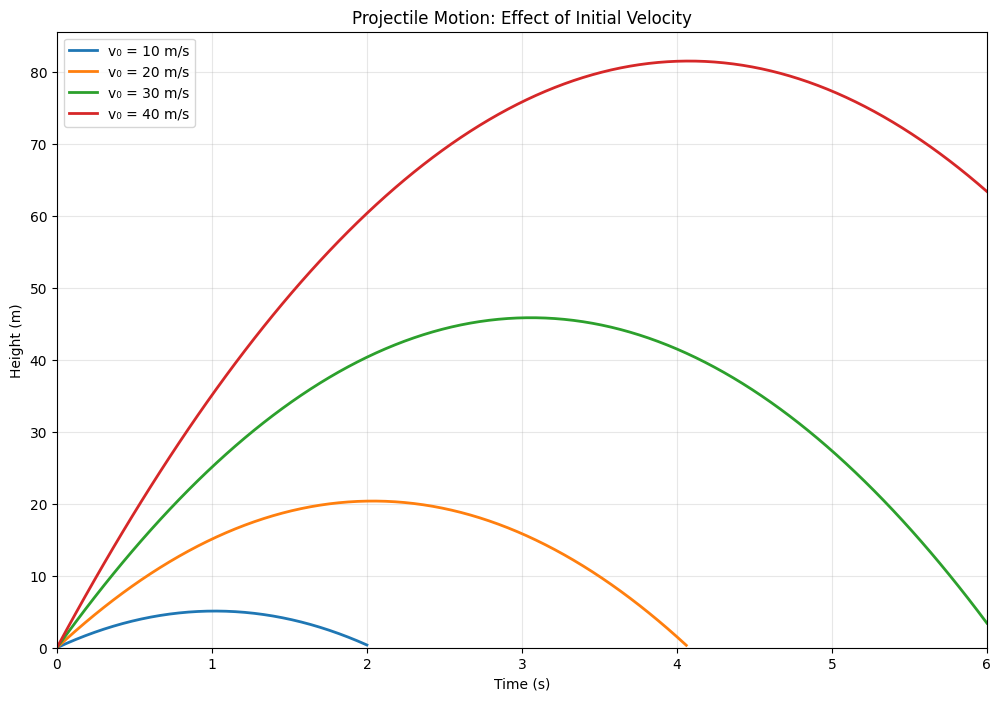


Flight times:
v₀ = 10 m/s: 2.04 seconds
v₀ = 20 m/s: 4.08 seconds
v₀ = 30 m/s: 6.12 seconds
v₀ = 40 m/s: 8.15 seconds


In [ ]:
# Compare different initial velocities
print("=== Comparing Different Initial Velocities ===")

t = np.linspace(0, 6, 100)
velocities = [10, 20, 30, 40]  # m/s

plt.figure(figsize=(12, 8))

# Plot multiple trajectories
for v0 in velocities:
    h = projectile_height(t, v0=v0)
    # Only plot positive heights (object hasn't hit ground yet)
    valid_indices = h >= 0
    plt.plot(t[valid_indices], h[valid_indices], linewidth=2, label=f'v₀ = {v0} m/s')

plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Projectile Motion: Effect of Initial Velocity')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 6)
plt.ylim(0, None)
plt.show()

# Calculate and display flight times
print("\nFlight times:")
for v0 in velocities:
    flight_time = 2 * v0 / 9.81  # Time when object returns to ground
    print(f"v₀ = {v0} m/s: {flight_time:.2f} seconds")


# Oscillations - A More Complex Example


=== Simple Harmonic Motion ===


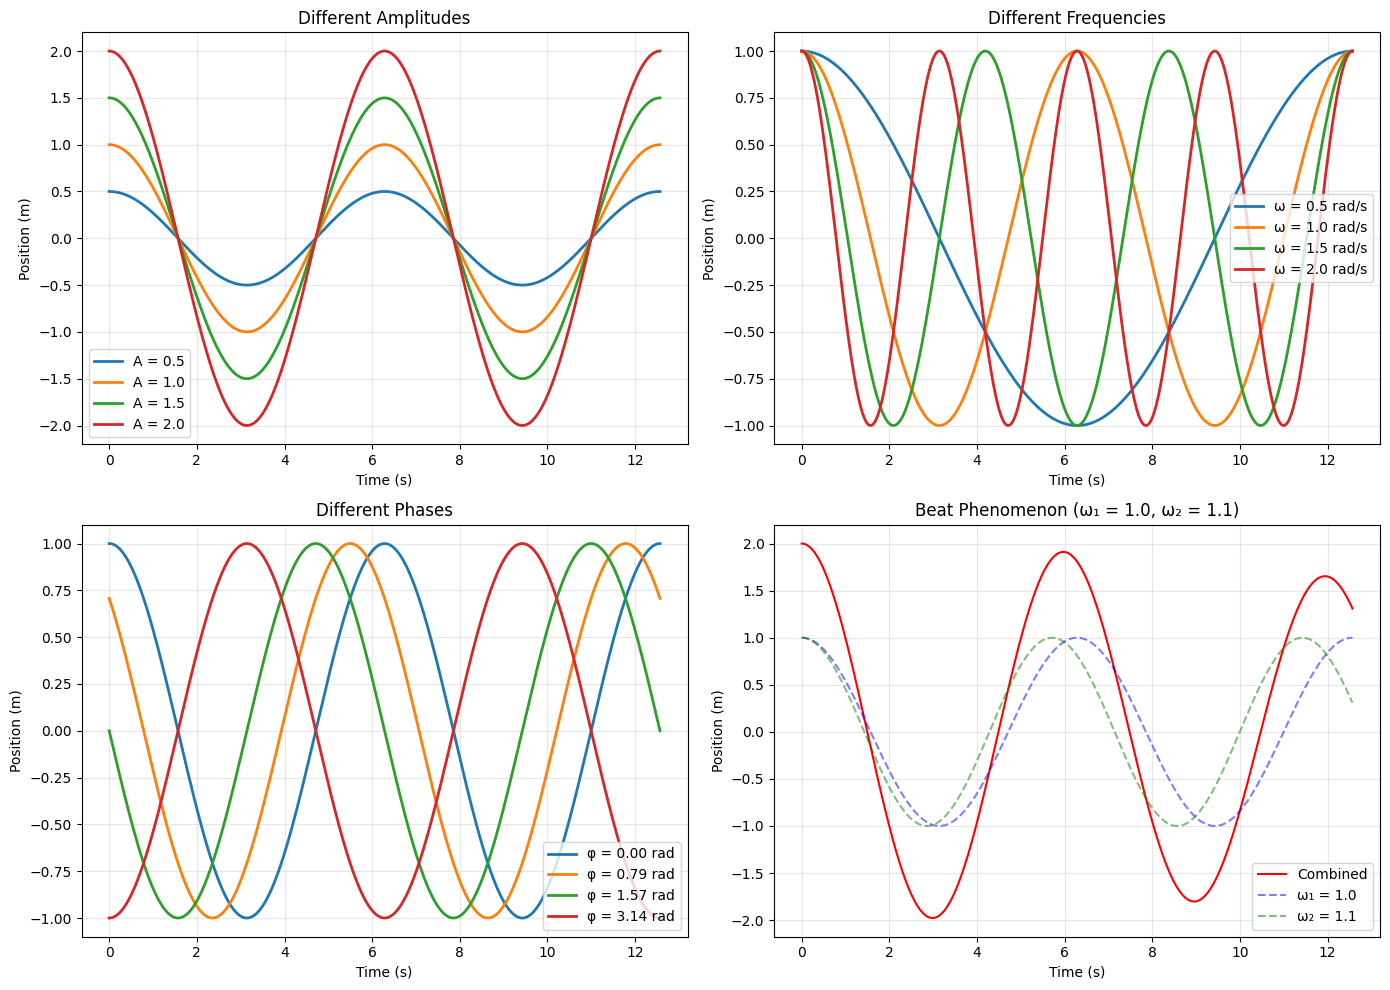

In [ ]:
# Demonstrate simple harmonic motion
print("=== Simple Harmonic Motion ===")

t = np.linspace(0, 4*np.pi, 500)

# Different oscillation parameters
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Different amplitudes
axes[0,0].set_title('Different Amplitudes')
for A in [0.5, 1.0, 1.5, 2.0]:
    x = simple_harmonic_motion(t, A=A, omega=1.0)
    axes[0,0].plot(t, x, linewidth=2, label=f'A = {A}')
axes[0,0].set_xlabel('Time (s)')
axes[0,0].set_ylabel('Position (m)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Different frequencies
axes[0,1].set_title('Different Frequencies')
for omega in [0.5, 1.0, 1.5, 2.0]:
    x = simple_harmonic_motion(t, A=1.0, omega=omega)
    axes[0,1].plot(t, x, linewidth=2, label=f'ω = {omega} rad/s')
axes[0,1].set_xlabel('Time (s)')
axes[0,1].set_ylabel('Position (m)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Different phases
axes[1,0].set_title('Different Phases')
for phi in [0, np.pi/4, np.pi/2, np.pi]:
    x = simple_harmonic_motion(t, A=1.0, omega=1.0, phi=phi)
    axes[1,0].plot(t, x, linewidth=2, label=f'φ = {phi:.2f} rad')
axes[1,0].set_xlabel('Time (s)')
axes[1,0].set_ylabel('Position (m)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Combination: two frequencies (beats phenomenon)
axes[1,1].set_title('Beat Phenomenon (ω₁ = 1.0, ω₂ = 1.1)')
x1 = simple_harmonic_motion(t, A=1.0, omega=1.0)
x2 = simple_harmonic_motion(t, A=1.0, omega=1.1)
x_combined = x1 + x2
axes[1,1].plot(t, x_combined, 'r-', linewidth=1.5, label='Combined')
axes[1,1].plot(t, x1, 'b--', alpha=0.5, label='ω₁ = 1.0')
axes[1,1].plot(t, x2, 'g--', alpha=0.5, label='ω₂ = 1.1')
axes[1,1].set_xlabel('Time (s)')
axes[1,1].set_ylabel('Position (m)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



# Array Operations and Physics Calculations


=== Array Operations in Physics ===
Mean acceleration: -2.55 m/s²
Standard deviation: 71.69 m/s²
Expected acceleration: 1.00 m/s²


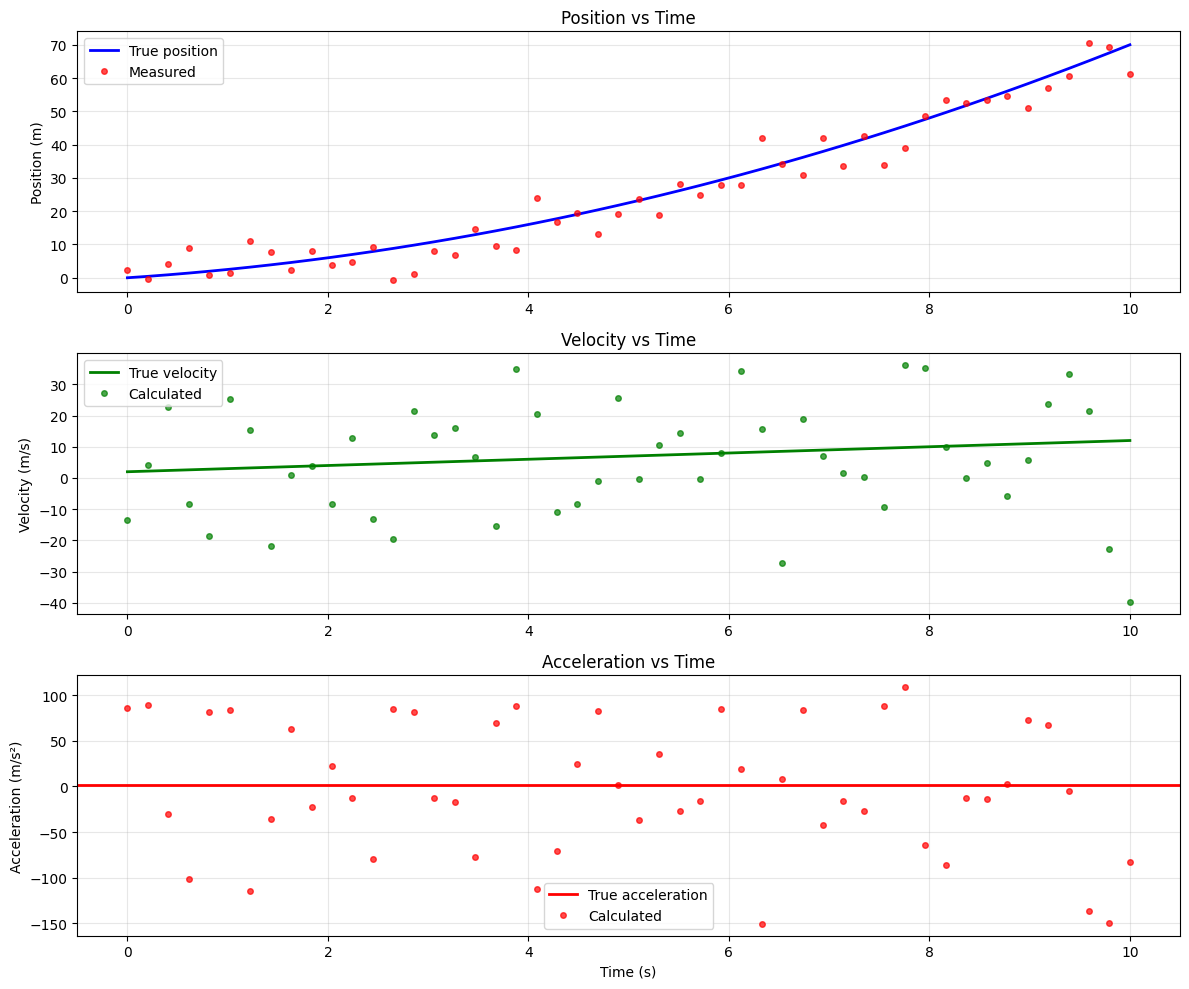

In [ ]:
# Demonstrate useful array operations for physics
print("=== Array Operations in Physics ===")

# Create sample data: position measurements with noise
np.random.seed(42)  # For reproducible results
t_data = np.linspace(0, 10, 50)
true_position = 2 * t_data + 0.5 * t_data**2  # x = v₀t + (1/2)at²
measured_position = true_position + np.random.normal(0, 5, len(t_data))  # Add noise

# Calculate velocity using numerical differentiation
dt = t_data[1] - t_data[0]
velocity = np.gradient(measured_position, dt)  # dx/dt
acceleration = np.gradient(velocity, dt)       # dv/dt

# Statistical analysis
print(f"Mean acceleration: {np.mean(acceleration):.2f} m/s²")
print(f"Standard deviation: {np.std(acceleration):.2f} m/s²")
print(f"Expected acceleration: 1.00 m/s²")

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Position
axes[0].plot(t_data, true_position, 'b-', linewidth=2, label='True position')
axes[0].plot(t_data, measured_position, 'ro', markersize=4, alpha=0.7, label='Measured')
axes[0].set_ylabel('Position (m)')
axes[0].set_title('Position vs Time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Velocity
true_velocity = 2 + t_data  # v = v₀ + at
axes[1].plot(t_data, true_velocity, 'g-', linewidth=2, label='True velocity')
axes[1].plot(t_data, velocity, 'go', markersize=4, alpha=0.7, label='Calculated')
axes[1].set_ylabel('Velocity (m/s)')
axes[1].set_title('Velocity vs Time')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Acceleration
axes[2].axhline(y=1.0, color='r', linestyle='-', linewidth=2, label='True acceleration')
axes[2].plot(t_data, acceleration, 'ro', markersize=4, alpha=0.7, label='Calculated')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Acceleration (m/s²)')
axes[2].set_title('Acceleration vs Time')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



## Summary and Next Steps

Summary of Key Concepts

🔍 What we've learned:

1. **NumPy Arrays**:
   - Efficient storage and computation for numerical data
   - Vectorized operations (no need for loops!)
   - Essential for physics calculations

2. **np.linspace**:
   - Creates evenly spaced arrays
   - Perfect for time series, angle ranges, etc.
   - Usage: np.linspace(start, stop, num_points)

3. **Functions**:
   - Organize and reuse physics calculations
   - Accept parameters with default values
   - Return computed values

4. **Matplotlib Plotting**:
   - Visualize physics phenomena
   - Multiple plots, labels, legends
   - Essential for understanding data

🚀 Next steps to explore:
- 2D and 3D plotting
- Animation of physics simulations
- Fitting curves to experimental data
- Solving differential equations numerically
- Signal processing for experimental data



📚 Quick Reference:


Create evenly spaced array:
```
t = np.linspace(0, 10, 100)
```

Define a physics function:
```
def physics_function(x, param1=default):"
  calculation = np.sin(x)*param1
  return calculation
```

Basic plot:

```
plt.plot(x, y, 'b-', label='Data')
plt.xlabel('X label')
plt.ylabel('Y label')
plt.legend(); plt.grid(True);
plt.show()
```